In [ ]:
!pip install faker

In [171]:
from IPython.display import clear_output
import sqlite3
from contextlib import closing
from datetime import datetime
from tqdm import tqdm

print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 13:42:20.004028


In [135]:
def select_data(db_file_path, db_data, reverse=False, verbose=0):
    """ select_data """
    with closing(sqlite3.connect(db_file_path)) as conn:
        with closing(conn.cursor()) as cur:
            col_dicts = {"n_estimator": (db_data[1], True),
                         "data_length": (db_data[2], True),
                         "random_state": (db_data[3], True),
                         "rounds": (db_data[4], False)
                         }
            where_list = []
            for col in col_dicts:
                if col_dicts[col][1]:
                    where_list.append(f'{col}={col_dicts[col][0]}')
                else:
                    where_list.append(f'{col}=\"{col_dicts[col][0]}\"')
            results = []
            query = f'select * from rndforest where {" and ".join(where_list)}'
            query += " order by id desc" if reverse else " order by id asc"
            if verbose > 0:
                print('query=', query)
            datas = cur.execute(query).fetchall()
            for data in datas:
                results.append(data)
            return results


def insert_data(db_file_path, db_data, auto_commit=True, verbose=0):
    """ insert_randomforest_db """
    with closing(sqlite3.connect(db_file_path)) as conn:
        col_dicts = {"n_estimator": db_data[1],
                     "data_length": db_data[2],
                     "random_state": db_data[3],
                     "rounds": db_data[4],
                     "matched_cnts": db_data[5],
                     "sum_val": db_data[6],
                     "version": db_data[7]+"_back"
                     }
        columns = col_dicts.keys()
        values=list(col_dicts.values())
        column_val=["?" for i in range(len(columns))]
        query = f"INSERT INTO rndforest ({','.join(columns)}) "\
        f"VALUES ({','.join(column_val)})"
        with closing(conn.cursor()) as cursor:
            if verbose > 0:
                print(f'query={query}')
                print('-'*30)
            cursor.execute(query, values)
            if auto_commit:
                conn.commit()


def backup_randomforest_db(db_file_path, db_datas, auto_commit=True, verbose=0):
    for db_data in db_datas:
        if verbose > 0:
            print('db_data = ', db_data)
        result = select_data(db_file_path, db_data, verbose=verbose)
        if len(result) == 0:
            insert_data(db_file_path, db_data, verbose=verbose)

print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 12:33:54.029919


In [136]:
verbose = 0
run_this_0 = False
if run_this_0:
    with closing(open('../db/1.txt', 'r')) as fd:
        print('step.0')
        lines = fd.readlines()
        datas = []
        for line in lines:
            line = line.replace('\n', '')
            datas.append(line.split('|'))
            if verbose > 0:
                print(line.split('|'))
        backup_randomforest_db(db_file_path='../db/metrics.db', db_datas = datas, verbose=1)

print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 12:33:58.829963


In [129]:

!echo "select * from rndforest where version=\"T_01_08_back\" and matched_cnts like '%3%3%3%3%3%';" | sqlite3 ../db/metrics.db

20944|10|400|338000|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|3,3,1,0,3,0,1,3,3,2|19|T_01_08_back


In [130]:
!echo "select * from rndforest where version=\"T_01_08_back\" and matched_cnts like '%3%3%3%3%3%';" | sqlite3 ../db/metrics.db

20944|10|400|338000|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|3,3,1,0,3,0,1,3,3,2|19|T_01_08_back


In [137]:
def db_row_parse(rows):
    """ db_row_parse """
    rows_list = []
    for row in rows:
        cols = row.split('|')
        col_dict = {
            "n_estimator": cols[1],
            "data_length": cols[2],
            "random_state": cols[3],
            "rounds": cols[4],
            "matched_cnts": cols[5],
            "sum_val": cols[6],
            "version": cols[7]
            }
        rows_list.append(col_dict)
    return rows_list


def execute_direct_query_for_sum_val_frequency(min_cnt, max_cnt, target_num, version, verbose=0):
    """ execute_direct_query_for_sum_val_frequency """
    likes = ""
    results = {}
    ## base
    for i in range(1, min_cnt):
        likes += f"%{target_num}"
    for i in range(min_cnt, max_cnt+1):
        likes += f"%{target_num}"
        if verbose > 0:
            !echo "{'-'*15} {target_num}'s num = {i} {'-'*15}"
        if verbose > 0:
            !echo "select * from rndforest where version=\"{version}\" and matched_cnts like \"{likes}%\" order by sum_val desc"
        rows = !echo "select * from rndforest where version=\"{version}\" and matched_cnts like \"{likes}%\" order by sum_val desc" | sqlite3 ../db/metrics.db
        rows_list = db_row_parse(rows)
        results[i] = rows_list
    return results


def print_colums(target_num, results, list_view=False):
    """ print_colums """
    for cnt in results:
        print(f"{'-'*15} {target_num}'s num = {cnt} {'-'*15}")
        for row in results[cnt]:
            if list_view:
                print(list(row.values()))
            else:
                print(row)


def db_query(min_cnt, max_cnt, target_num, version, print_data=False, list_view=False, verbose=0):
    """ db_query """
    results = execute_direct_query_for_sum_val_frequency(min_cnt=min_cnt, max_cnt=max_cnt, target_num=target_num, version=version, verbose=verbose)
    if print_data:
        print_colums(target_num, results, list_view)
    return results


print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 12:34:02.420591


In [ ]:
# 3이 많이 발생하는 경우 확인
run_this_3 = False
if run_this_3:
    min_cnt = 3
    max_cnt = 7
    target_num = 3
    version = "T_01_08_back"
    results3_T01_08_back = db_query(min_cnt=min_cnt, max_cnt=max_cnt, version=version, target_num=target_num, print_data=True, list_view=True)

In [ ]:
# 3이 많이 발생하는 경우 확인
min_cnt = 0
max_cnt = 7
target_num = 3
version = "T_01_08"
results3_T01_08 = db_query(min_cnt=min_cnt, max_cnt=max_cnt, version=version, target_num=target_num, print_data=True, list_view=True)

In [ ]:
# 4가 많이 발생하는 경우 확인
min_cnt = 2
max_cnt = 7
target_num = 4
# versions = ["T_01_08_back", "T_01_08"]
versions = ["T_01_08"]
results_dict4 = {}
for version in versions:
    print(f'\n{"*"*15} Checking version = [{version}] {"*"*15}\n')
    results = db_query(min_cnt=min_cnt, max_cnt=max_cnt, version=version, target_num=target_num, print_data=True, list_view=True)
    results_dict4[version] = results

In [ ]:
# 5/6이 많이 발생하는 경우 확인
min_cnt = 1
max_cnt = 3
target_nums = [5, 6]
# versions = ["T_01_08_back", "T_01_08"]
versions = ["T_01_08"]
results_dict5 = {}
for version in versions:
    results_dict5[version] = {}
    for target_num in target_nums:
        print(f'\n{"*"*15} Checking version = [{version} / {target_num}] {"*"*15}\n')
        results = db_query(min_cnt=min_cnt,
                           max_cnt=max_cnt,
                           version=version,
                           target_num=target_num,
                           print_data=True,
                           list_view=True)
        results_dict5[version][target_num] = results

In [ ]:
# find n_estimators=[25, 10]
#  data_lengths = [40]
#  random_state_gap = 1
#  last_rounds = [1176]
!echo "select * from rndforest where version=\"T_01_03\" and sum_val > 14;" | sqlite3 ../db/metrics.db
!echo "...........like 4.............................."
!echo "select * from rndforest where version in (\"T_01_03\", \"T_01_07\") and matched_cnts like \"%4%\";" | sqlite3 ../db/metrics.db
!echo "...........like 5.............................."
!echo "select * from rndforest where version in (\"T_01_03\", \"T_01_07\") and matched_cnts like \"%5%\";" | sqlite3 ../db/metrics.db
!echo "...........like 6.............................."
!echo "select * from rndforest where version in (\"T_01_03\", \"T_01_07\") and matched_cnts like \"%6%\";" | sqlite3 ../db/metrics.db
!echo "..............................................."
!echo "select * from rndforest where version in (\"T_01_07\", \"T_01_03\") and sum_val > 13;" | sqlite3 ../db/metrics.db
!echo "..............................................."


In [ ]:
# find n_estimators=[25, 10]
#  data_lengths = [40]
#  random_state_gap = 1
#  last_rounds = [1176]
version="T_01_05"
!echo "select * from rndforest where version=\"T_01_03\" and random_state in (357, 264, 762, 864);" | sqlite3 ../db/metrics.db
!echo "select * from rndforest where version=\"T_01_06\" and sum_val > 2;" | sqlite3 ../db/metrics.db

In [ ]:
# find n_estimators=[25, 10]
#  data_lengths = [40]
#  random_state_gap = 1
#  last_rounds = [1176, 1175]
version="T_01_05"
!echo "select * from rndforest where version=\"T_01_05\" and sum_val > 3;" | sqlite3 ../db/metrics.db

In [ ]:
# find n_estimators=[25, 10]
#  data_lengths = [40]
#  random_state_gap = 1
#  last_rounds = [1176, 1175, 1174]
!echo "select * from rndforest where version=\"T_01_04\" and sum_val > 5;" | sqlite3 ../db/metrics.db

In [ ]:
# find n_estimators=[25, 10]
#  data_lengths = [40]
#  random_state_gap = 1
#  last_rounds = [1176, 1175, 1174, 1173]
!echo "select * from rndforest where version=\"T_01_02\" and sum_val > 7;" | sqlite3 ../db/metrics.db

In [ ]:
old_versions = ["T_01_01", "T_01_02", "T_01_03", "T_01_04", "T_01_05"]
sum_val = 7
for version in old_versions:
    !echo "select * from rndforest where version=\"{version}\" and sum_val > {sum_val};" | sqlite3 ../db/metrics.db

In [ ]:
!echo "select * from rndforest where version=\"T_01_03\" and random_state=762;" | sqlite3 ../db/metrics.db
!echo "........................................."
!echo "select * from rndforest where version=\"T_01_03\" and sum_val > 12;" | sqlite3 ../db/metrics.db

In [138]:
import itertools
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import random
from faker import Factory

def draw_datas_graph(title,
                     x_y_datas,
                     x_label,
                     y_label,
                     width=0,
                     height=0,
                     file_name="",
                     is_bar=True,
                     verb=False):
    """ draw_data_graph """
    fake = Factory.create()
    for x_y_data in x_y_datas:
        if is_bar:
            if len(x_y_data) > 2:
                plt.bar(x_y_data[0], x_y_data[1], color=fake.hex_color(), label=x_y_data[2])
            else:
                plt.bar(x_y_data[0], x_y_data[1], color=fake.hex_color())
        else:
            if len(x_y_data) > 2:
                plt.plot(x_y_data[0], x_y_data[1], color=fake.hex_color(), label=x_y_data[2])
            else:
                plt.plot(x_y_data[0], x_y_data[1], color=fake.hex_color())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.title(title)
    if len(file_name) > 0:
        plt.legend(loc=0)
        plt.savefig(file_name)
    if width > 0 and height > 0:
        plt.figure(figsize=(width,height))
    plt.show()

print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 12:34:09.531059


In [139]:
def data_graph_from_db(version: str, random_states: list, verbose=0):
    """ data_graph_from_db """
    DB_FILE="../db/metrics.db"

    if len(random_states) == 0:
        wheres = ""
    else:
        temp = [str(i) for i in random_states]
        wheres = f'and random_state in ({",".join(temp)})'
    rows = !echo "select * from rndforest where version=\"{version}\" {wheres} order by random_state asc" | sqlite3 {DB_FILE}

    x_y_datas = []
    for row in rows:
        cols = row.split("|")
        n_estimator = cols[1]
        data_length = cols[2]
        random_state = cols[3]
        rounds = [int(i) for i in cols[4].split(',')]
        matched_cnts = [int(i) for i in cols[5].split(',')]
        rounds.reverse()
        matched_cnts.reverse()
        sum_val = cols[6]
        x_y_datas.append((rounds, matched_cnts, str(random_state)))
        # print(f'{n_estimator} / {data_length} / {random_state} / {sum_val}')
        if verbose > 0:
            print('rounds', rounds)
            print('matched_cnts', matched_cnts)

    # ## predict data
    # file_name = "img/temp.png"
    draw_datas_graph(title="matched_cnts",
                     x_y_datas=x_y_datas,
                     x_label="rounds",
                     y_label="matched_cnts",
                     width=0,
                     height=0,
                     file_name="",
                     is_bar=False,
                     verb=False if verbose == 0 else True)

print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 12:34:14.519593


In [165]:
def check_yes(title, wanted: list, default: str):
    """ check_yes """
    is_continue_str = input(title)
    if len(is_continue_str) == 0:
        is_continue_str = default
    if is_continue_str in wanted:
        return True
    return False


def check_continue():
    """ check_conotinue """
    return check_yes("Continue ? (Y/n)", ["Y", "y"], "y")


def check_append_to_list():
    """ check_conotinue """
    return check_yes("Append to list ? (Y/n)", ["Y", "y"], "n")


def check_reset_list():
    """ check_conotinue """
    return check_yes("Reset list ? (Y/n)", ["Y", "y"], "n")


def check_remove_this(value):
    """ check_remove_this """
    return check_yes(f"Remove this({value}) ? (Y/n)", ["Y", "y"], "n")


def get_wanted_item(title) -> list:
    """ get_wanted_item """
    wanted_line = input(title)
    if len(wanted_line) > 0:
        return wanted_line.split(",")
    return []


print(f'define this code : [now={datetime.now()}')

define this code : [now=2025-06-17 13:32:04.227384


## 1. __N개 씩 데이터를 읽어서 화면에 표시합니다.__

### 1.1 글로벌 변수 정의

In [189]:
## - 데이터 보존을 위하여 여기에서 정의합니다.
answer_list = []
first = 113700
last = 113800
step = 10

In [183]:
# for i in ['113686', '113700', '113708', '113738', '113746', '113750', '113755', '113759', '113765', '113776', '113783', '113789', '113792', '113794', '113795']:
#     answer_list.append(int(i))

### 1.2 데이터 확인 (N개 씩)

In [ ]:
T_VERSION="T_01_10"
first = int(input(f"처음을 입력하세요: (ex: {first})"))
last = int(input(f"마지막을 입력하세요: (ex: {last})"))
step_str = input(f"step을 입력하세요: (ex: {step})")
if len(step_str) > 0:
    step = int(step_str)
else:
    step = 10


for current in tqdm(range(first, last, step)):
    # %matplotlib inline
    is_last_data = False
    begin = current
    end = current + step
    if end > last:
        end = last
        print('마지막 데이터 입니다.')
        is_last_data = True
    print(begin, end)
    random_states = [i for i in range(begin, end, 1)]
    print(f'random_states = {random_states}')
    data_graph_from_db(version=T_VERSION, random_states=random_states,verbose=0)

    wanted_items = get_wanted_item('저장할 번호를 선택하세요. (","로 분리하세요)')
    for random_state in wanted_items:
        if random_state not in answer_list:
            answer_list.append(random_state)

    if is_last_data == False:
        is_continue = check_conotinue()
        if is_continue == False:
            break
        else:
            clear_output()


In [180]:
print(f'first = {first}')
print(f'end   = {end}')
print(f'step  = {step}')
print(f'selected = {answer_list}')

first = 113650
end   = 113653
step  = 3
selected = [113686, 113700, 113708, 113738, 113746, 113750, 113755, 113759, 113765, 113776, 113783, 113789, 113792, 113794, 113795]


### 1.3 위에서 저장한 random_state를 그래프로 확인 함.

 93%|█████████▎| 14/15 [00:16<00:00,  1.28it/s]

selected random_state :  113795


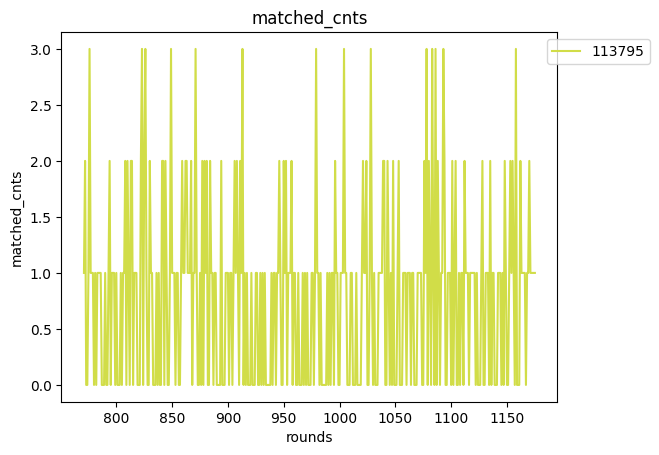

Remove this(113795) ? (Y/n) 


100%|██████████| 15/15 [00:16<00:00,  1.13s/it]


In [172]:
print(f'{"="*30}')
temp_list = answer_list
for random_state in tqdm(temp_list):
    if temp_list[len(temp_list)-1] == random_state:
        is_last_data = True
    else:
        is_last_data = False
    print('selected random_state : ', random_state)
    data_graph_from_db(version=T_VERSION, random_states=[random_state],verbose=0)
    is_remove_this = check_remove_this(random_state)
    if is_remove_this:
        answer_list.remove(random_state)
    if is_last_data == False:
        is_continue = check_conotinue()
        if is_continue == False:
            break
        else:
            clear_output()

In [167]:
print(f'first = {first}')
print(f'end   = {end}')
print(f'step  = {step}')
print(f'selected = {answer_list}')

first = 113670
end   = 113800
step  = 5
selected = ['113686', '113700', '113708', '113738', '113746', '113750', '113755', '113759', '113765', '113776', '113783', '113789', '113792', '113794', '113795']


## 2. _*위에서 선택 된 데이터에 대해서 한 번 더 그래프를 확인 합니다.*_

 80%|████████  | 4/5 [00:14<00:03,  3.55s/it]

random_state = 113789


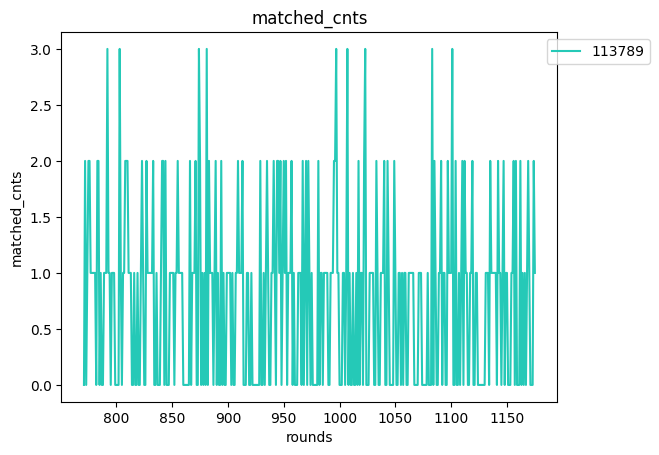

100%|██████████| 5/5 [00:14<00:00,  2.93s/it]


In [176]:
T_VERSION="T_01_10"
# random_states = [114001, 114003, 114005, ]
# random_states = [114005, ]
# random_states = [113723, 113732, 113738]
# 113791, 113798
# 113661
# 113797
random_states = [113700, 113738, 113696, 113745, 113789]
for random_state in tqdm(random_states):
    print(f'random_state = {random_state}')
    if random_state == random_states[len(random_states) - 1]:
        is_last = True
    else:
        is_last = False
    data_graph_from_db(version=T_VERSION, random_states=[random_state],verbose=0)
    if is_last == False:
        is_continue = check_conotinue()
        if is_continue == False:
            break
        else:
            clear_output()

## 한 개의 데이터 만을 확인 합니다.

random_state를 ","로 구분하여 입력하여 주세요. 113650


  0%|          | 0/1 [00:00<?, ?it/s]

random_state = 113650


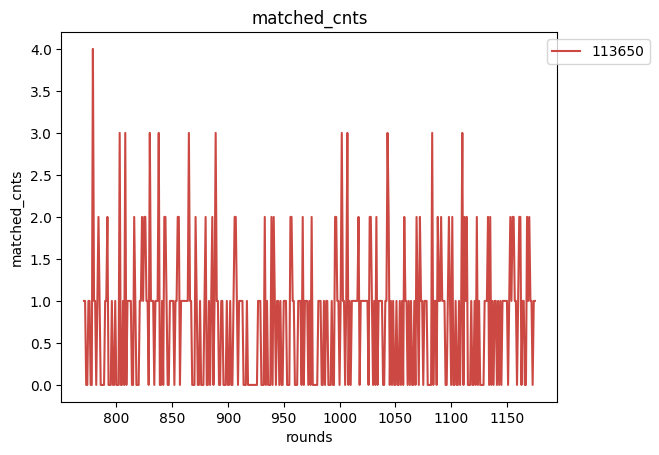

100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


In [181]:
T_VERSION="T_01_10"

random_states = get_wanted_item('random_state를 ","로 구분하여 입력하여 주세요.')

for random_state in tqdm(random_states):
    print(f'random_state = {random_state}')
    if random_state == random_states[len(random_states) - 1]:
        is_last = True
    else:
        is_last = False
    data_graph_from_db(version=T_VERSION, random_states=[random_state],verbose=0)
    if is_last == False:
        is_continue = check_conotinue()
        if is_continue == False:
            break
        else:
            clear_output()